# Mujoco python

In [126]:
import mujoco as mj
from mujoco.glfw import glfw
import numpy as np
import os

In [127]:
# base_path = os.path.dirname(os.path.abspath(__file__))
base_path = os.path.abspath('')
xml_path = os.path.join(base_path, "../backuo_xml/scene.xml")
scene = mj.MjModel.from_xml_path(xml_path)  # MuJoCo model
data = mj.MjData(scene)                     # MuJoCo data
cam = mj.MjvCamera()                        # Abstract camera
opt = mj.MjvOption()                        # visualization options

In [128]:
scene.actuator_trnid

array([[ 0, -1],
       [ 1, -1],
       [ 2, -1],
       [ 3, -1],
       [ 4, -1],
       [ 5, -1],
       [ 6, -1]], dtype=int32)

## Model in mujoco

在物理系统中，广义坐标（generalized coordinates）是定义系统状态的最小坐标集，通常由位置和角度变量组成，可以唯一地确定系统的状态。例如，在机器人系统中，可以使用关节角度作为广义坐标，用于描述机器人的位置和姿态。另一方面，笛卡尔坐标（Cartesian coordinates）是在直角坐标系中定义的坐标，用于表示点的位置。在物理仿真中，通常使用笛卡尔坐标来描述物体的位置和速度。

在MuJoCo中，通常使用q表示广义坐标，因为它们是定义系统状态的最小集合，并且在动力学和控制方程中使用。另一方面，x代表笛卡尔坐标，因为它们描述了物体在世界坐标系中的位置和速度。在实践中，广义坐标和笛卡尔坐标经常一起使用，例如，在控制器中使用笛卡尔坐标来描述期望位置和速度，并将其转换为广义坐标进行控制。

|类型|说明|数值|
|---|---|---|
|nq|generalized coordinates|dim(qpos)|
|nv|degrees of freedom|dim(qvel)|
|nu|actuators/controls|dim(ctrl)|
|na|activation states|dim(act)|
|nbody|bodies| |
|nbvh|total bounding volumes in all bodies| |
|njnt|joints| |
|ngeom|geoms| |
|nsite|sites| |



In [ ]:
# 返回场景内的一些对象的总数, scaler
# number of coordinates, freedom, controls, bodies, joints output: (68, 67, 7, 39, 62)
scene.nq, scene.nv, scene.nu, scene.nbody, scene.njnt 

# 返回某个对象的父对象的索引, np.ndarray
scene.body_parentid # parent body index
len(scene.body_parentid) # 39
id_son = mj.mj_name2id(scene, mj.mjtObj.mjOBJ_BODY, "N26")
id_father = scene.body_parentid[id_son] # 35
id_grandfather = scene.body_parentid[id_father] # 34

# 得到所有的对象类型
mj._enums.mjtObj.__entries # output: {'mjOBJ_UNKNOWN': 0, 'mjOBJ_BODY': 1, ...}

# 返回一个对象的所有有效属性和方法的列表
dir(scene) # mujoco._structs.MjModel
dir(scene.body("N26")) # mujoco._structs._MjModelBodyViews
dir(data) # mujoco._structs.MjData
dir(data.body("N26")) # mujoco._structs._MjDataBodyViews
1

''

In [ ]:
def get_model_prop(model: mj._structs.MjModel, obj_type: str, name: str, prop_name:str):
    try:
        obj_view = getattr(model, obj_type)(name)
        return getattr(obj_view, prop_name)
    except AttributeError as e:
        return e
    
get_model_prop(scene, "body", "N26", "xpos")

AttributeError("'mujoco._structs._MjModelBodyViews' object has no attribute 'xpos'")

In [ ]:
dir(scene)

## Data in mujoco

q表示广义坐标，x代表笛卡尔坐标, i代表质心坐标

|Type|Name|Description|Shape|
|---|---|---|---|
|mjtNum|qpos|position，generalized coordinates|nq|
|mjtNum|qvel|velocity，degrees of freedom|nv|
|mjtNum|act|actuator activation，activation states|na|
|mjtNum|qacc_warmstart|acceleration used for warmstart|nv|
|mjtNum|plugin_state|plugin state|npluginstate|
|mjtNum|ctrl|control，actuators/controls|nu|
|mjtNum|qfrc_applied|applied generalized force|nv|
|mjtNum|xfrc_applied|applied Cartesian force/torque|nbody x 6|
|mjtNum|xpos|Cartesian position of body frame|nbody x 3|
|mjtNum|xquat|Cartesian orientation of body frame|nbody x 4|
|mjtNum|xmat|Cartesian orientation of body frame|nbody x 9|
|mjtNum|xipos|Cartesian position of body com|nbody x 3|
|mjtNum|ximat|Cartesian orientation of body inertia|nbody x 9|
|mjtNum|xanchor|Cartesian position of joint anchor|njnt x 3|
|mjtNum|xaxis|Cartesian joint axis|njnt x 3|
|mjtNum|geom_xpos|Cartesian geom position|ngeom x 3|
|mjtNum|geom_xmat|Cartesian geom orientation|ngeom x 9|
|mjtNum|site_xpos|Cartesian site position|nsite x 3|
|mjtNum|site_xmat|Cartesian site orientation|nsite x 9|



In [ ]:
# 返回笛卡尔坐标系下的力和扭矩
data.xfrc_applied.shape, scene.nbody # applied Cartesian force/torque (nbody x 6)  output:((38, 6), 38)
# 返回关节每个自由度下的力或扭矩, free有6个自由度, ball有3个自由度, hinge有1个自由度
data.qfrc_applied.shape, scene.nv # applied generalized force (nv x 1) output:((67,), 67)

# 返回一个对象的所有有效属性和方法的列表
dir(scene) # mujoco._structs.MjModel
dir(scene.body("N26")) # mujoco._structs._MjModelBodyViews
dir(data) # mujoco._structs.MjData
dir(data.body("N26")) # mujoco._structs._MjDataBodyViews
1

''

In [ ]:
data.qpos

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
def get_data_prop(data, elem_name: str, name: str, prop_name:str):
    obj_view = getattr(data, elem_name)(name)
    return getattr(obj_view, prop_name)

get_data_prop(data, "body", "N26", "xpos") # array([ 0.        ,  0.        , -0.00010001])

array([0., 0., 0.])

## Parse Joint

每个joint的实例是一个`mujoco._structs._MjModelJointViews`类, 父类来自`pybind11_builtins.pybind11_object`中的c对象

|Name|Type|Description|Shape|
|---|---|---|---|
|jnt_type|int|Type of joint (mjtJoint)|(njnt x 1)|
|jnt_qposadr|int|Start address in 'qpos' for joint's data|(njnt x 1)|
|jnt_dofadr|int|Start address in 'qvel' for joint's data|(njnt x 1)|
|jnt_bodyid|int|ID of joint's body|(njnt x 1)|
|jnt_group|int|Group for visibility|(njnt x 1)|
|jnt_limited|mjtByte|Does joint have limits?|(njnt x 1)|
|jnt_solref|mjtNum|Constraint solver reference: limit|(njnt x mjNREF)|
|jnt_solimp|mjtNum|Constraint solver impedance: limit|(njnt x mjNIMP)|
|jnt_pos|mjtNum|Local anchor position|(njnt x 3)|
|jnt_axis|mjtNum|Local joint axis|(njnt x 3)|
|jnt_stiffness|mjtNum|Stiffness coefficient|(njnt x 1)|
|jnt_range|mjtNum|Joint limits|(njnt x 2)|
|jnt_margin|mjtNum|Minimum distance for limit detection|(njnt x 1)|
|jnt_user|mjtNum|User data|(njnt x nuser_jnt)|

In [ ]:
# 关节对应的类型, np.ndarray
scene.jnt_type # 0: free, 1: ball, 2: slide, 3: hinge, 4: universal, 5: fixed
len(scene.jnt_type), set(scene.jnt_type) # output: (62, {0, 3})

try:
  scene.jnt()
except KeyError as e:
  print(e)

# 通过关节的名字获取关节的属性
scene.jnt("obj00").id # 61
scene.jnt("obj00").type # 0
scene.jnt("obj00").name # 'obj00'
scene.jnt("obj00").qposadr # 61 # qposadr: the index of the first coordinate of the joint in qpos
scene.jnt("obj00").dofadr # 61 # dofadr: the index of the first coordinate of the joint in qvel
scene.jnt("obj00").bodyid # [37, 37, 37, 37, 37, 37] # bodyid: the index of the body attached to the joint
scene.jnt("obj00").group # 0
scene.jnt("obj00").limited # 0 no limit
scene.jnt("obj00").pos # [0. 0. 0.] # pos: the position of the joint in the parent body frame
scene.jnt("obj00").axis # [0. 0. 1.] # axis: the axis of the joint in the parent body frame

# 直接获取属性值
id = mj.mj_name2id(scene, mj.mjtObj.mjOBJ_JOINT, "obj00") # 61
scene.jnt_bodyid[id] # the father body id of a given joint
scene.jnt_axis[id]
scene.jnt_pos[id]
scene.jnt_type[id]
scene.jnt_range[id]

# 尝试通过关节的id获取对应的关节名字
mj.mj_id2name(scene, mj.mjtObj.mjOBJ_JOINT, 61) # 'obj00'
# 尝试通过关节的名字获取对应的关节id
mj.mj_name2id(scene, mj.mjtObj.mjOBJ_JOINT, "obj00") # 61

# 遍历所有关节的id, 并获取对应的关节名字
for i in range(scene.njnt):
    print(f"[{i} : {mj.mj_id2name(scene, mj.mjtObj.mjOBJ_JOINT, i)}]", end="\t")
    if i % 10 == 9:
        print()

"Invalid name ''. Valid names: ['joint1', 'joint2', 'joint3', 'joint4', 'joint5', 'joint6', 'joint7', 'obj00']"
[0 : joint1]	[1 : joint2]	[2 : joint3]	[3 : joint4]	[4 : joint5]	[5 : joint6]	[6 : joint7]	[7 : None]	[8 : None]	[9 : None]	
[10 : None]	[11 : None]	[12 : None]	[13 : None]	[14 : None]	[15 : None]	[16 : None]	[17 : None]	[18 : None]	[19 : None]	
[20 : None]	[21 : None]	[22 : None]	[23 : None]	[24 : None]	[25 : None]	[26 : None]	[27 : None]	[28 : None]	[29 : None]	
[30 : None]	[31 : None]	[32 : None]	[33 : None]	[34 : None]	[35 : None]	[36 : None]	[37 : None]	[38 : None]	[39 : None]	
[40 : None]	[41 : None]	[42 : None]	[43 : None]	[44 : None]	[45 : None]	[46 : None]	[47 : None]	[48 : None]	[49 : None]	
[50 : None]	[51 : None]	[52 : None]	[53 : None]	[54 : None]	[55 : None]	[56 : None]	[57 : None]	[58 : None]	[59 : None]	
[60 : None]	[61 : obj00]	

## Parse Body

In [ ]:
scene.body("stage") # 35

<_MjModelBodyViews
  dofadr: array([-1], dtype=int32)
  dofnum: array([0], dtype=int32)
  geomadr: array([117], dtype=int32)
  geomnum: array([4], dtype=int32)
  id: 38
  inertia: array([34134.66666667, 17100.66666667, 17100.66666667])
  invweight0: array([0., 0.])
  ipos: array([0.  , 0.  , 0.25])
  iquat: array([0.        , 0.70710678, 0.        , 0.70710678])
  jntadr: array([-1], dtype=int32)
  jntnum: array([0], dtype=int32)
  mass: array([1600.])
  mocapid: array([-1], dtype=int32)
  name: 'stage'
  parentid: array([0], dtype=int32)
  pos: array([0., 0., 0.])
  quat: array([1., 0., 0., 0.])
  rootid: array([38], dtype=int32)
  sameframe: array([0], dtype=uint8)
  simple: array([0], dtype=uint8)
  subtreemass: array([1600.])
  user: array([], dtype=float64)
  weldid: array([0], dtype=int32)
>

In [ ]:
data.body("stage")

<_MjDataBodyViews
  cacc: array([0., 0., 0., 0., 0., 0.])
  cfrc_ext: array([0., 0., 0., 0., 0., 0.])
  cfrc_int: array([0., 0., 0., 0., 0., 0.])
  cinert: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
  crb: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
  cvel: array([0., 0., 0., 0., 0., 0.])
  id: 38
  name: 'stage'
  subtree_angmom: array([0., 0., 0.])
  subtree_com: array([0., 0., 0.])
  subtree_linvel: array([0., 0., 0.])
  xfrc_applied: array([0., 0., 0., 0., 0., 0.])
  ximat: array([0., 0., 0., 0., 0., 0., 0., 0., 0.])
  xipos: array([0., 0., 0.])
  xmat: array([0., 0., 0., 0., 0., 0., 0., 0., 0.])
  xpos: array([0., 0., 0.])
  xquat: array([0., 0., 0., 0.])
>

## Example of setting the initial state of the a element

In [ ]:
# randomize body position, but keep it with in the range of the room 4 meters
# and hight 1.5-1.8 which is the height range when the object is thrown
radius = 4
x0 = np.random.uniform(-radius, radius)
y0 = (radius**2 - x0**2)**0.5
z0 = np.random.uniform(1.5, 1.8)
theta = -np.arctan(y0 / x0)
scene.body("00").pos = np.array([x0, y0, z0])

# through the object to 6-8 meters away
g = -scene.opt.gravity[-1] # gravity
dist = np.random.uniform(6, 9)
mass = scene.body("00").mass[0]
pitch = np.random.uniform(30, 45) * np.pi / 180 # ptich angle is between 30-45 degree
yaw = np.arctan(2 / radius)
yaw = np.random.uniform(-yaw, yaw)
yaw = theta + yaw
# 计算初始速度
v0 = (g * dist / np.sin(2 * pitch)) ** 0.5
vx = v0 * np.cos(pitch) * np.cos(yaw)
vy = v0 * np.cos(pitch) * np.sin(yaw)
vz = v0 * np.sin(pitch)

str = f'''
初始位置为  {x0, y0, z0}
瞄准方向为  {theta}
重力为      {g}
距离为      {dist}
质量为      {mass}
pitch为   {pitch}
yew为     {yaw}
初速度为    {v0}
'''
print(str)

# set initial position and velocity
data.joint("obj00").qpos = np.array([x0, y0, z0, 1, 0, 0, 0])
data.joint("obj00").qvel = np.array([vx, vy, vz, 0, 0.1, 0.1])

"Invalid name ''. Valid names: ['00', 'N00', 'N01', 'N02', 'N03', 'N04', 'N05', 'N06', 'N07', 'N08', 'N09', 'N10', 'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24', 'N25', 'N26', 'link0', 'link1', 'link2', 'link3', 'link4', 'link5', 'link6', 'link7', 'stage', 'whip', 'world']"

初始位置为  (1.378545922805504, 3.754944891568493, 1.6953114834862975)
瞄准方向为  -1.2189448125231286
重力为      9.81
距离为      6.731217051650521
质量为      4.593680209679825
pitch为   0.6460197462028764
yew为     -1.1153115909255442
初速度为    8.28761632389586



# Deepmind control suite

## PyMJCF
PyMJCF is a Python library for creating MuJoCo XML files. It is designed to be easy to use and to provide a high level of abstraction over the XML format. It is intended to be used in conjunction with the MuJoCo physics engine, which is available for free from the [MuJoCo website](http://www.mujoco.org/).

In [1]:
# Graphics-related
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import PIL.Image
# Internal loading of video libraries.

# Use svg backend for figure rendering
%config InlineBackend.figure_format = 'svg'

# Font sizes
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def display_video(frames, framerate=30):
    height, width, _ = frames[0].shape
    dpi = 70
    orig_backend = matplotlib.get_backend()
    matplotlib.use('Agg')  # Switch to headless 'Agg' to inhibit figure rendering.
    fig, ax = plt.subplots(1, 1, figsize=(width / dpi, height / dpi), dpi=dpi)
    matplotlib.use(orig_backend)  # Switch back to the original backend.
    ax.set_axis_off()
    ax.set_aspect('equal')
    ax.set_position([0, 0, 1, 1])
    im = ax.imshow(frames[0])
    def update(frame):
      im.set_data(frame)
      return [im]
    interval = 1000/framerate
    anim = animation.FuncAnimation(fig=fig, func=update, frames=frames,
                                   interval=interval, blit=True, repeat=False)
    return HTML(anim.to_html5_video())

In [89]:
# PyMJCF
import numpy as np
from dm_control import mjcf

class Arm(object):
    """A 7-DoF arm from franka, named panda. https://www.franka.de/research"""
    def __init__(self, ctrl_type="position"):
        self.model = mjcf.from_path("../xml/panda/panda.xml")
        self.ctrl_type = ctrl_type
        self._add_actuators(self.model.find_all("joint"))
        self.pos = np.zeros(3)
    
    def install_end_effector(self, end_effector):
        self.mount_site = self.model.find("site", "mount_site")
        self.mount_site.attach(end_effector)

    def _add_actuators(self, jnts):
        actuator = mjcf.from_path(f"../xml/panda/actuator/{self.ctrl_type}.xml")
        acts = actuator.actuator.all_children()
        assert len(jnts) == len(acts)
        for jnt, act in zip(jnts, acts):
            if act.tag == "general":
                print(jnt.name, act.joint)
                self.model.actuator.add(
                                act.tag, 
                                name=act.name, 
                                dclass=act.dclass,
                                joint=jnt, 
                                gainprm=act.gainprm,
                                biasprm=act.biasprm,
                                ctrlrange=act.ctrlrange, 
                                forcerange=act.forcerange,)
            elif act.tag == "motor":
                # print(act.tag, act.joint, act.name, act.dclass)
                self.model.actuator.add(
                                act.tag, 
                                name=act.name, 
                                dclass=act.dclass,
                                joint=jnt, 
                                ctrlrange=act.ctrlrange, 
                                forcerange=act.forcerange,)
       

class Whip(object):
    """A whip with a ball at the start."""
    def __init__(self, type=1):
        assert type in [0, 1]
        self.model = mjcf.from_path(f"../xml/whip/whip{type}.xml")
        if type == 1:
            self.n_node = self.model.find_all("composite")[0].count[0]
        else:
            self.n_node = int(self.model.find_all("body")[-1].name[1:]) + 1
    def add_end_tip(self):
        # find the last body
        pass

class FlyObj(object):
    """A flying object"""
    def __init__(self, random=True, radius=2, type="ball"):
        self.radius = radius
        self.pos = self._set_pos()
        self.type = type
        
        if random:
            obj_name = f"{np.random.choice(range(9)):02d}"
            self.model = mjcf.from_path(f"../xml/objects/{obj_name}/{obj_name}.xml")
        else:
            self.model = mjcf.from_path(f"../xml/objects/00/00.xml")
        self.model.find_all("joint")[0].type = self.type
  
    def _set_pos(self):
        radius = self.radius
        x0 = np.random.uniform(-radius, radius)
        y0 = (radius**2 - x0**2)**0.5
        z0 = np.random.uniform(1.5, 1.8)
        return np.array([x0, y0, z0])


def make_scene(random=True, obj_id=None, save=False, obj_type="ball"):
    """Constructs a simulation scene with a panda arm holding a whip and a random generated free object."""
    # Prepare arm
    arm = Arm(ctrl_type="torque")
    whip = Whip(type=0)
    arm.install_end_effector(whip.model)

    # Prepare object
    obj = FlyObj(random=random, type=obj_type)
    # remove free joint
    obj.model.find_all("joint")[0].remove()

    # Prepare scene
    scene = mjcf.from_path("../xml/scene.xml")
    site4arm = scene.worldbody.add("site", pos=arm.pos)
    site4obj = scene.worldbody.add("site", pos=obj.pos)     
    site4arm.attach(arm.model)
    site4obj.attach(obj.model).add("joint", type=obj.type, name="obj_jnt") # if dont want the object to move, add a ball joint instead
    return scene


In [90]:
import PIL.Image

def get_distance(physics):
    src_pos = physics.named.data.geom_xpos["panda/whip//unnamed_geom_54"]
    tgt_pos = physics.named.data.xpos["obj/"]
    return np.linalg.norm((src_pos, tgt_pos), ord = 2)

scene = make_scene(random=True, save=True, obj_type="free")

str_xml = scene.to_xml_string()
# save string to file
with open("../xml/_saved.xml", "w") as f:
    f.write(str_xml)
    
physics = mjcf.Physics.from_mjcf_model(scene)
# PIL.Image.fromarray(physics.render())

duration = 2    # (seconds)
framerate = 30  # (Hz)
# Simulate and display video.
frames = []
timevals = []
pos_arm = []
pos_obj = []
distance = []

# physics.reset(0.5)  # Reset to keyframe 0 (load a saved state).
while physics.data.time < duration:
    physics.step()
    pos_arm.append(physics.named.data.xpos["panda/link7", "z"])
    pos_obj.append(physics.data.body("obj/").xpos[-1])
    timevals.append(physics.data.time)
    distance.append(get_distance(physics))
    if len(frames) < (physics.data.time) * framerate:
        pixels = physics.render()
        frames.append(pixels.copy())

display_video(frames, framerate)

/Users/baixianger/miniconda3/envs/thesis/lib/python3.10/site-packages/dm_control/mjcf/attribute.py:215: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  self._assign(np.fromstring(string, dtype=self._dtype, sep=' '))


In [82]:
obj_body = scene.find("body", "obj/obj")
physics.bind(obj_body).xpos
whip_geom = scene.find_all("geom")[-3]

physics.bind(whip_geom).xpos.__class__.__mro__

(dm_control.mjcf.physics.SynchronizingArrayWrapper, numpy.ndarray, object)

In [83]:
geoms = scene.find_all("geom")
for geom1, geom2 in zip(physics.data.contact.geom1, physics.data.contact.geom2):
    print(geoms[geom1].name, geoms[geom2].parent.name, end="\t")

floor link6	floor N14	floor N14	floor N15	floor N15	floor N15	floor N16	floor N16	floor N16	floor N17	floor N17	floor N17	floor N18	floor N18	floor N18	floor N19	floor N19	floor N19	floor N20	floor N20	floor N20	floor N21	floor N21	floor N21	floor N22	floor N22	floor N22	floor N23	floor N23	floor N23	floor N24	floor N24	floor N24	floor N25	floor N25	floor N25	floor N26	floor N26	floor N26	floor obj	floor obj	floor obj	

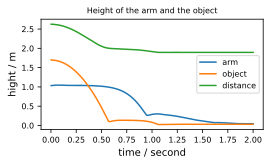

In [51]:
%matplotlib inline
plt.figure(figsize=(4, 2))
plt.plot(timevals, pos_arm, label='arm')
plt.plot(timevals, pos_obj, label='object')
plt.plot(timevals, distance, label='distance')
plt.title('Height of the arm and the object')
plt.ylabel('hight / m')
plt.xlabel('time / second')
plt.legend()
plt.show()

## Composer

In [2]:
# Composer high level imports
from dm_control import composer
from dm_control.composer.observation import observable
from dm_control.composer import variation

# Imports for Composer tutorial example
from dm_control.composer.variation import distributions
from dm_control.composer.variation import noises
from dm_control.locomotion.arenas import floors

In [92]:
class Arm_Whip(composer.Entity):
    """A multi-legged creature derived from `composer.Entity`."""
    def _build(self, ctrl_type="position", type=0):
        arm = Arm(ctrl_type=ctrl_type)
        whip = Whip(type=type)
        arm.install_end_effector(whip.model)
        self._model = arm.model
        self._contact = self._model.find_all("geom")[-1]
        
    def _build_observables(self):
        return Arm_Whip_Observables(self)

    @property
    def mjcf_model(self):
        return self._model
    
    @property
    def source(self):
        return self._contact
    
    @property
    def actuators(self):
        # Return a tuple of all actuators in the model.
        # Check the class of the actuator is panda
        acts = self._model.find_all('actuator')
        acts = [act for act in acts if act.dclass == "panda"]
        return tuple(acts)


class Arm_Whip_Observables(composer.Observables):
    """Observables for the Arm_Whip entity. The self._entity is the given composer.Entity class"""
    @composer.observable
    def key_jnts_qpos(self):
        key_jnts = [self._entity.mjcf_model.find_all('joint')[i] for i in [0,1,2,3,4,5,6,-1]]
        return observable.MJCFFeature('qpos', key_jnts)

    @composer.observable
    def key_jnts_qvel(self):
        key_jnts = [self._entity.mjcf_model.find_all('joint')[i] for i in [0,1,2,3,4,5,6,-1]]
        return observable.MJCFFeature('qvel', key_jnts)
    
    @composer.observable    
    def key_jnts_qacc(self):
        key_jnts = [self._entity.mjcf_model.find_all('joint')[i] for i in [0,1,2,3,4,5,6,-1]]
        return observable.MJCFFeature('qacc', key_jnts)
    
    @composer.observable    
    def key_jnts_qfrc(self):
        key_jnts = [self._entity.mjcf_model.find_all('joint')[i] for i in [0,1,2,3,4,5,6,-1]]
        return observable.MJCFFeature('qfrc_applied', key_jnts)
    
    @composer.observable
    def whip_end_geom_xpos(self):
        whip_end_geom = self._entity.mjcf_model.find_all('geom')[-1] 
        return observable.MJCFFeature('xpos', whip_end_geom)


In [93]:
class Target(composer.Entity):

    def _build(self, type="fixed", mocap=False):
        # TODO: add a mocap body instead of a body with a joint
        self._mjcf_model = FlyObj(random=True, type="ball").model
        # mount sensors on the object
        self._body = self._mjcf_model.find_all("body")[0] # the outer obody of the object
        self._jnt = self._mjcf_model.find_all("joint")[0] # the joint of the object
        self._contact = self._mjcf_model.find_all("geom")[-1] # the geom of the object

    def _build_observables(self):
        return TargetObservables(self)

    @property
    def mjcf_model(self):
        return self._mjcf_model
    
    @property
    def target(self):
        return self._contact
    
    
class TargetObservables(composer.Observables):
    """A touch sensor which averages contact force over physics substeps."""
    @composer.observable
    def xpos(self):
        return observable.MJCFFeature('xpos', self._entity._body)

In [94]:
height = distributions.Uniform(1, 1.5)
radius = distributions.Uniform(1, 1.5)

class RandomPos(variation.Variation):
    """A uniformly sampled position for the object."""
    def __init__(self, radius, height):
        self._radius = radius
        self._height = height
        self._heading = distributions.Uniform(0, 2*np.pi)

    def __call__(self, initial_value=None, current_value=None, random_state=None):
        radius, heading, height = variation.evaluate(
            (self._radius, self._heading, self._height), random_state=random_state)
        return (radius*np.cos(heading), radius*np.sin(heading), height)

RandomPos(radius, height)()

(-0.05473402424522524, -1.0320453066270847, 1.2013100301788817)

In [95]:

class HitTarget(composer.Task):

    def __init__(self):
        self._arm_whip = Arm_Whip()
        self._target = Target()
        self._arena = floors.Floor()
        # self._arena.mjcf_model.worldbody.camera[0].remove() # remove the annoying default camera from arena
        # self._arena.mjcf_model.worldbody.add('camera', name='top_cam',  pos=[0, 0, 2], fovy=100, quat=[1, 0, 0, 0])
        # self._arena.mjcf_model.worldbody.add('camera', name="front_cam",pos=[0, -2, 0], zaxis=[0, 2, 1])
        self._arena.attach(self._arm_whip)
        self._arena.attach(self._target)

        # Configure initial poses
        self._arm_initial_pose = (0, 0, 0)
        tgt_height = distributions.Uniform(1, 1.5)
        tgt_radius = distributions.Uniform(1, 1.5)
        self._target_initial_pose = RandomPos(tgt_radius, tgt_height)

        # Configure variators
        self._mjcf_variator = variation.MJCFVariator()       # An instance of this class remembers the original value of each MJCF attribute the first time a variation is applied. The original value is then passed as an argument to each variation callable.
        self._physics_variator = variation.PhysicsVariator() # An instance of this class remembers the original value of each attribute the first time a variation is applied. The original value is then passed as an argument to each variation callable.

        # Configure and enable observables
        # pos_corrptor = noises.Additive(distributions.Normal(scale=0.01))
        # vel_corruptor = noises.Multiplicative(distributions.LogNormal(sigma=0.01))
        # self._arm_whip.observables.key_jnts_qpos.corruptor = pos_corrptor           # value of the joint position
        self._arm_whip.observables.key_jnts_qpos.enabled = True
        # self._arm_whip.observables.key_jnts_qvel.corruptor = vel_corruptor
        self._arm_whip.observables.key_jnts_qvel.enabled = True
        # self._arm_whip.observables.whip_end_geom_xpos.corruptor = pos_corrptor      # value of the whip end position
        self._arm_whip.observables.whip_end_geom_xpos.enabled = True
        # self._target.observables.xpos.corruptor = pos_corrptor
        self._target.observables.xpos.enabled = True

        self._task_observables = {}
        self._task_observables['distance'] = observable.Generic(self._distance)
        self._task_observables['hit_flag'] = observable.Generic(self._hit_flag)

        for obs in self._task_observables.values():
            obs.enabled = True

    def _distance(self, physics):
        # target_pos, _ = self._target.get_pose(physics) # a world-frame position
        source = self._arm_whip.source
        target = self._target.target
        source_pos = physics.bind(source).xpos # a world-frame position
        target_pos = physics.bind(target).xpos # a world-frame position
        return np.linalg.norm((target_pos, source_pos), ord = 2)
    
    def _hit_flag(self, physics):
        target = self._target.target
        source = self._arm_whip.source
        source_id = physics.bind(source).element_id, 
        target_id = physics.bind(target).element_id
        return (source_id, target_id) in zip(physics.data.contact.geom1, physics.data.contact.geom2) \
            or (target_id, source_id) in zip(physics.data.contact.geom1, physics.data.contact.geom2)

    @property
    def root_entity(self):
        return self._arena

    @property
    def task_observables(self):
        return self._task_observables

    def initialize_episode_mjcf(self, random_state):
        # The Environment calls this method and recompiles the physics if necessary before calling initialize_episode.
        self._mjcf_variator.apply_variations(random_state)

    def initialize_episode(self, physics, random_state):
        # Environment calls this method after initialize_episode_mjcf, and also after the physics has been recompiled if necessary.
        self._physics_variator.apply_variations(physics, random_state)
        arm_pose, target_pose = variation.evaluate(
            (self._arm_initial_pose, self._target_initial_pose),
            random_state=random_state)
        self._arm_whip.set_pose(physics, position=arm_pose)
        self._target.set_pose(physics, position=target_pose)
        self._reward = 0

    def get_reward(self, physics):
        reward = 1.0 / (self._distance(physics) + 1e-6)
        bonus = 1.0 / (physics.data.time + 1e-6)
        sigmoid_reward = 1.0 / (1 + np.exp(-reward))
        sigmoid_bonus = 1.0 / (1 + np.exp(-bonus))
        return sigmoid_reward + sigmoid_bonus

/Users/baixianger/miniconda3/envs/thesis/lib/python3.10/site-packages/dm_control/mjcf/attribute.py:215: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  self._assign(np.fromstring(string, dtype=self._dtype, sep=' '))


joint1 joint1
joint2 joint2
joint3 joint3
joint4 joint4
joint5 joint5
joint6 joint6
joint7 joint7


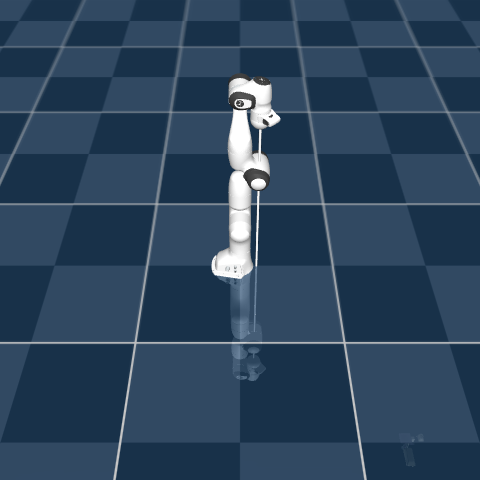

In [96]:
task = HitTarget()
env = composer.Environment(task, random_state=np.random.RandomState(42))
env.reset()
PIL.Image.fromarray(env.physics.render(height=480, width=480))
# from dm_control import viewer
# viewer.launch(env)

In [97]:
initial_data = env.reset()
initial_data.observation

{'distance': array([1.68310882]),
 'hit_flag': array([False]),
 'panda/key_jnts_qpos': array([[0., 0., 0., 0., 0., 0., 0., 0.]]),
 'panda/key_jnts_qvel': array([[0., 0., 0., 0., 0., 0., 0., 0.]]),
 'panda/whip_end_geom_xpos': array([[ 0.088,  0.   , -0.091]]),
 'obj/xpos': array([[0.72343837, 1.07930228, 1.07799726]])}

In [98]:
action = [0, -1.76, 0, -3.07, 0, 0, 0]
time_step = env.step(action)
initial_data.observation

{'distance': array([1.68310882]),
 'hit_flag': array([False]),
 'panda/key_jnts_qpos': array([[0., 0., 0., 0., 0., 0., 0., 0.]]),
 'panda/key_jnts_qvel': array([[0., 0., 0., 0., 0., 0., 0., 0.]]),
 'panda/whip_end_geom_xpos': array([[ 0.088,  0.   , -0.091]]),
 'obj/xpos': array([[0.72343837, 1.07930228, 1.07799726]])}

In [136]:

env.physics.model.actuator_actadr, scene.actuator_actadr

(array([-1, -1, -1, -1, -1, -1, -1], dtype=int32),
 array([-1, -1, -1, -1, -1, -1, -1], dtype=int32))

In [134]:
env.physics.data.ctrl

array([ 0.  , -1.76,  0.  , -3.07,  0.  ,  0.  ,  0.  ])

In [13]:
physics = env.physics
print(physics.__class__.__mro__) # 这个physics是个大杂烩，继承了很多类

print(task.observables["distance"](physics)) # 
print(task.observables["hit_flag"](physics)) #
print(task._target.observables.xpos(physics)) #

target = task._target.target
source = task._arm_whip.source
source_id = physics.bind(source).element_id, 
target_id = physics.bind(target).element_id
(source_id, target_id) in zip(physics.data.contact.geom1, physics.data.contact.geom2)
physics.bind(source).element_id # 114 
physics.bind(target).element_id # 116
physics.model.ngeom # 117

(<class 'dm_control.mjcf.physics.Physics'>, <class 'dm_control.mujoco.engine.Physics'>, <class 'dm_control.rl.control.Physics'>, <class 'object'>)
3.010682571316063
False
[0.90863115 2.12852854 1.95027519]


117

## Control Suite

In [18]:
import copy

random_state=np.random.RandomState(42)
time_limit = 60
task = HitTarget()
env = composer.Environment(task, time_limit, random_state)

# Simulate episode with random actions
duration = 2  # Seconds
frames = []
ticks = []
rewards = []
observations = []

# spec is a type, with  '_maximum', '_minimum', '_name', '_shape', 'dtype', 'generate_value', 'maximum', 'minimum', 'name', 'replace', 'shape', 'validate' attributes
spec = env.action_spec() # dm_env.specs.BoundedArray
# print(spec.shape) # (7,)
# print(spec.dtype) # float64
# print(spec.minimum) # [-87. -87. -87. -87. -12. -12. -12.]
# print(spec.maximum) # [87. 87. 87. 87. 12. 12. 12.]

# time_step is a dm_env._environment.TimeStep, with 'count', 'discount', 'first', 'index', 'last', 'mid', 'observation', 'reward', 'step_type' attributes
time_step = env.reset() # dm_env._environment.TimeStep
# print(time_step.reward) 
# print(time_step.discount) 
# print(time_step.observation)
# print(time_step.step_type) # FIRST

action_spec = env.action_spec()

def sample_random_action(mask = None):
    action = env.random_state.uniform(
        low=action_spec.minimum * 0.7,
        high=action_spec.maximum * 0.7,
        ).astype(action_spec.dtype, copy=False)
    if mask is not None:
        action *= mask
    return action
action = [0, -1.76, 0, -3.07, 0, 0, 0]

while env.physics.data.time < duration:

    # action = sample_random_action(mask=[1, 1, 0, 1, 0, 1, 0])
    time_step = env.step(action)
    rewards.append(time_step.reward)
    observations.append(copy.deepcopy(time_step.observation))
    ticks.append(env.physics.data.time)
    if len(frames) < env.physics.data.time / env.control_timestep():
        camera0 = env.physics.render(height=400, width=400)
        # camera1 = env.physics.render(camera_id=1, height=400, width=400)
        # frames.append(np.hstack((camera0, camera1)))
        frames.append(camera0)


display_video(frames, framerate=1./env.control_timestep())

/Users/baixianger/miniconda3/envs/thesis/lib/python3.10/site-packages/dm_control/mjcf/attribute.py:215: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  self._assign(np.fromstring(string, dtype=self._dtype, sep=' '))


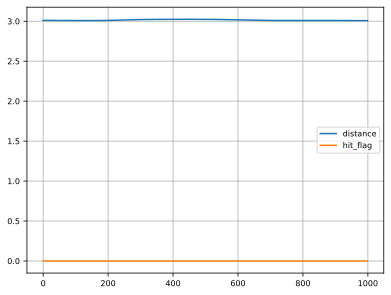

In [15]:

# Show video and plot reward and observations
distances = np.array([obs['distance'] for obs in observations])
hit_flags = np.array([obs['hit_flag'] for obs in observations])


plt.plot(distances, label='distance')
plt.plot(hit_flags, label='hit_flag')
plt.grid()
plt.legend()
plt.show()

## Manipulation Suite

In [16]:
from dm_control import manipulation